# 1. Повнозв'язані нейронні мережі

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
dafr = pd.read_csv('Hotel Reservations.csv')
print(dafr.info(), '\n')
dafr.head()

dafr = dafr.drop(['Booking_ID', 'avg_price_per_room', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'booking_status'], axis = 1)
dafr = dafr.drop(['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'], axis = 1)

for c_l in list(dafr.select_dtypes(include=['object']).columns):
    dafr[c_l] = LabelEncoder().fit_transform(dafr[c_l])

dafr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,no_of_special_requests
0,2,0,1,2,0,0,0,3,0,0
1,2,0,2,3,3,0,0,4,0,1
2,1,0,2,1,0,0,0,4,0,0
3,2,0,0,2,0,0,0,4,0,0
4,2,0,1,1,3,0,0,4,0,0


In [50]:
scaler1 = MinMaxScaler()
X_scaled = scaler1.fit_transform(dafr)
dafr[dafr.columns] = X_scaled
dafr.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,no_of_special_requests
0,0.50,0.0,0.142857,0.117647,0.000000,0.0,0.0,0.75,0.0,0.0
1,0.50,0.0,0.285714,0.176471,1.000000,0.0,0.0,1.00,0.0,0.2
2,0.25,0.0,0.285714,0.058824,0.000000,0.0,0.0,1.00,0.0,0.0
3,0.50,0.0,0.000000,0.117647,0.000000,0.0,0.0,1.00,0.0,0.0
4,0.50,0.0,0.142857,0.058824,1.000000,0.0,0.0,1.00,0.0,0.0
5,0.50,0.0,0.000000,0.117647,0.333333,0.0,0.0,1.00,0.0,0.2
6,0.50,0.0,0.142857,0.176471,0.000000,0.0,0.0,1.00,0.0,0.2
7,0.50,0.0,0.142857,0.176471,0.000000,0.0,0.5,1.00,0.0,0.2
8,0.75,0.0,0.000000,0.235294,0.000000,0.0,0.0,0.75,0.0,0.2
9,0.50,0.0,0.000000,0.294118,0.000000,0.0,0.5,1.00,0.0,0.6


In [51]:
X = dafr.drop(['room_type_reserved'], axis = 1)
y = dafr['room_type_reserved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [52]:
model = keras.Sequential([layers.Dense(8, activation='tanh'),layers.Dense(1, activation="sigmoid")])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=16,validation_split=0.2,verbose = 2)

Epoch 1/10
1451/1451 - 5s - loss: 0.3550 - accuracy: 0.7760 - val_loss: 0.3323 - val_accuracy: 0.7714 - 5s/epoch - 3ms/step
Epoch 2/10
1451/1451 - 4s - loss: 0.3199 - accuracy: 0.7765 - val_loss: 0.3130 - val_accuracy: 0.7717 - 4s/epoch - 3ms/step
Epoch 3/10
1451/1451 - 4s - loss: 0.3077 - accuracy: 0.7772 - val_loss: 0.3059 - val_accuracy: 0.7729 - 4s/epoch - 3ms/step
Epoch 4/10
1451/1451 - 3s - loss: 0.3036 - accuracy: 0.7774 - val_loss: 0.3036 - val_accuracy: 0.7729 - 3s/epoch - 2ms/step
Epoch 5/10
1451/1451 - 2s - loss: 0.3024 - accuracy: 0.7777 - val_loss: 0.3027 - val_accuracy: 0.7733 - 2s/epoch - 1ms/step
Epoch 6/10
1451/1451 - 3s - loss: 0.3016 - accuracy: 0.7777 - val_loss: 0.3020 - val_accuracy: 0.7733 - 3s/epoch - 2ms/step
Epoch 7/10
1451/1451 - 4s - loss: 0.3011 - accuracy: 0.7777 - val_loss: 0.3020 - val_accuracy: 0.7733 - 4s/epoch - 3ms/step
Epoch 8/10
1451/1451 - 4s - loss: 0.3007 - accuracy: 0.7777 - val_loss: 0.3017 - val_accuracy: 0.7734 - 4s/epoch - 3ms/step
Epoch 9/

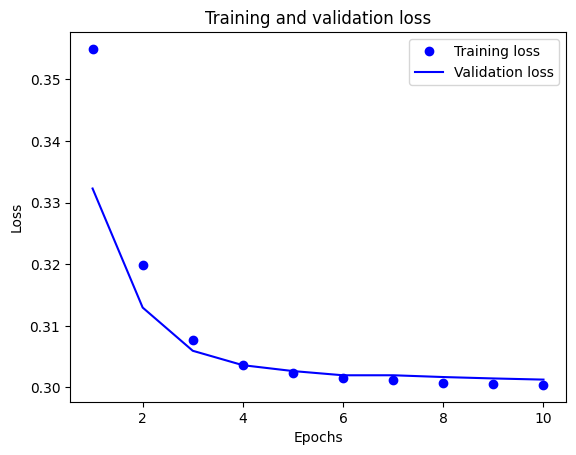

In [53]:
# графік втрат 
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [54]:
#оцінимо ефективність моделі
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print(model.summary())

Test score: 0.2992953360080719
Test accuracy: 0.7772570848464966
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 80        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 89 (356.00 Byte)
Trainable params: 89 (356.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# 2. Згорткові нейронні мережі

In [2]:
import os
import numpy as np
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

2024-01-19 11:53:17.701535: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 11:53:17.940372: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 11:53:17.940501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 11:53:17.994135: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 11:53:18.076518: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 11:53:18.079271: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
!ls peim

Cat  Dog


Filter out corrupted images

When working with lots of real-world image data, corrupted images are a common occurence. Let's filter out badly-encoded images that do not feature the string "JFIF" in their header.

In [4]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("peim", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 0 images.


Generate a Dataset

In [5]:
#180x180
image_size = (70, 70)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


Visualize the data

Here are the first 9 images in the training dataset.

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


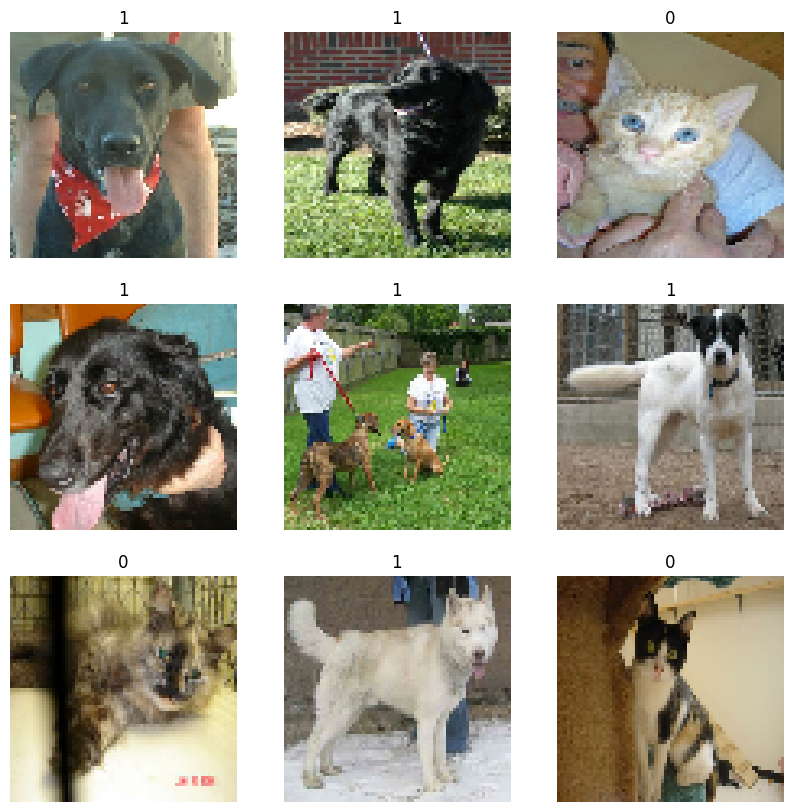

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

Using image data augmentation

In [7]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


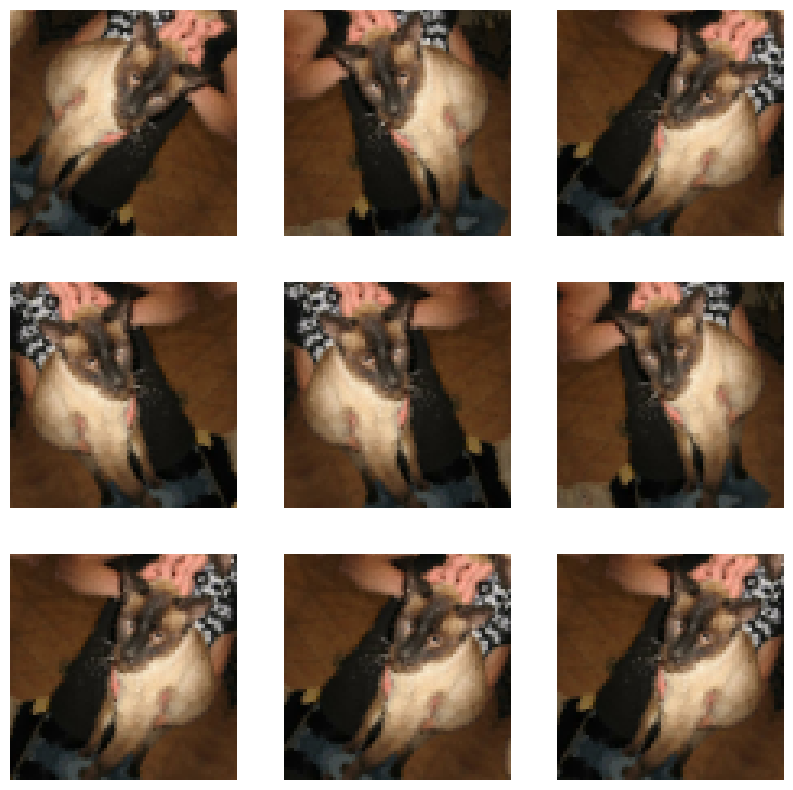

In [8]:
# 
# SHOULD USE ANOTHER IMAGE
#

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [ ]:
#augmented_train_ds = train_ds.map(
#    lambda x, y: (data_augmentation(x, training=True), y))

Configure the dataset for performance

In [9]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

Build a model

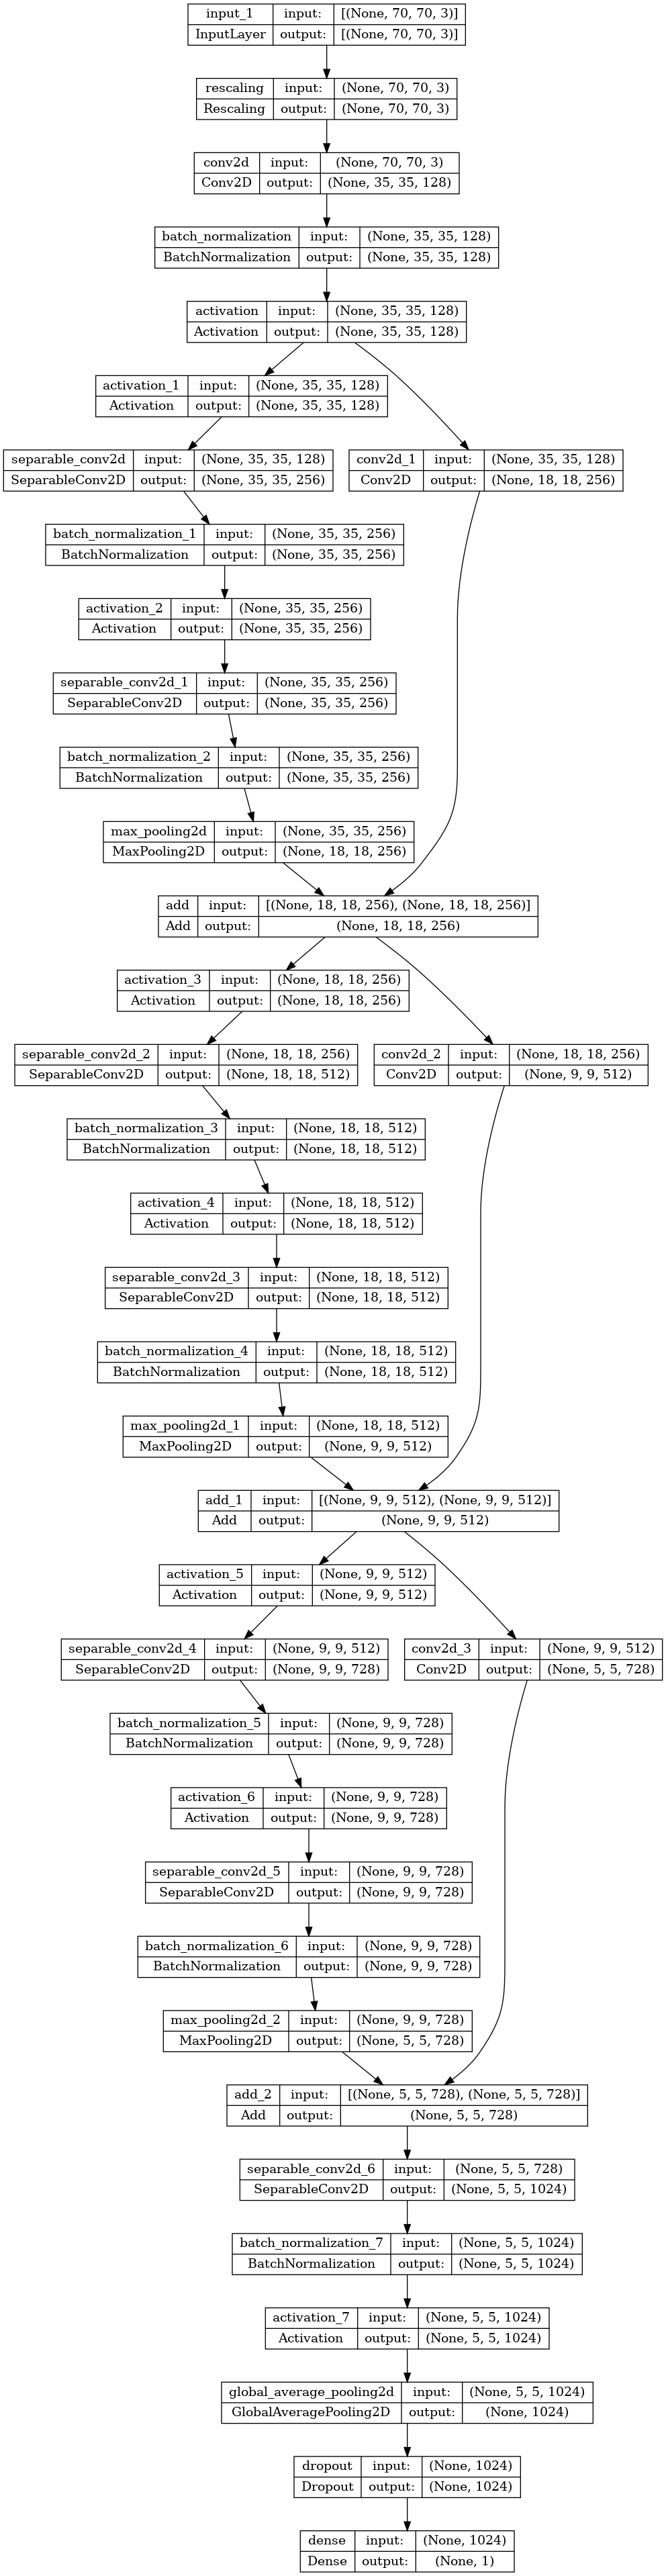

In [10]:
import pydot
import graphviz

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

Train the model

In [11]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
2024-01-19 11:54:55.503620: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 80281600 exceeds 10% of free system memory.
2024-01-19 11:54:55.637363: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 80281600 exceeds 10% of free system memory.
2024-01-19 11:54:55.769710: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2024-01-19 11:54:55.770014: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 80281600 exceeds 10% of free system memory.
2024-01-19 11:54:55.874675: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 80281600 exceeds 10% of free system memory.


 67/147 [============>.................] - ETA: 7:20 - loss: 0.6171 - acc: 0.6421

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 75/147 [==============>...............] - ETA: 6:34 - loss: 0.6116 - acc: 0.6481

 94/147 [==================>...........] - ETA: 4:47 - loss: 0.5990 - acc: 0.6616

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 97/147 [==================>...........] - ETA: 4:30 - loss: 0.5970 - acc: 0.6627

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


100/147 [===================>..........] - ETA: 4:14 - loss: 0.5955 - acc: 0.6642

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


101/147 [===================>..........] - ETA: 4:08 - loss: 0.5947 - acc: 0.6649

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.5716 - acc: 0.6844

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 831s 6s/step - loss: 0.5716 - acc: 0.6844 - val_loss: 0.6953 - val_acc: 0.4957
Epoch 2/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 64/147 [============>.................] - ETA: 6:49 - loss: 0.4806 - acc: 0.7554

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 72/147 [=============>................] - ETA: 6:11 - loss: 0.4771 - acc: 0.7571

 91/147 [=================>............] - ETA: 4:39 - loss: 0.4715 - acc: 0.7610

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 94/147 [==================>...........] - ETA: 4:24 - loss: 0.4710 - acc: 0.7616

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 97/147 [==================>...........] - ETA: 4:10 - loss: 0.4708 - acc: 0.7614

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 98/147 [===================>..........] - ETA: 4:05 - loss: 0.4699 - acc: 0.7616

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.4591 - acc: 0.7701

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 798s 5s/step - loss: 0.4591 - acc: 0.7701 - val_loss: 0.7051 - val_acc: 0.4957
Epoch 3/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 64/147 [============>.................] - ETA: 7:30 - loss: 0.4207 - acc: 0.7936

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 72/147 [=============>................] - ETA: 6:43 - loss: 0.4160 - acc: 0.7968

 91/147 [=================>............] - ETA: 5:11 - loss: 0.4119 - acc: 0.7986

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 94/147 [==================>...........] - ETA: 4:56 - loss: 0.4107 - acc: 0.7995

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 97/147 [==================>...........] - ETA: 4:39 - loss: 0.4096 - acc: 0.8001

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 98/147 [===================>..........] - ETA: 4:33 - loss: 0.4112 - acc: 0.7992

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.4040 - acc: 0.8040

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 896s 6s/step - loss: 0.4040 - acc: 0.8040 - val_loss: 0.7507 - val_acc: 0.5045
Epoch 4/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 64/147 [============>.................] - ETA: 8:34 - loss: 0.3671 - acc: 0.8286

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 72/147 [=============>................] - ETA: 7:46 - loss: 0.3633 - acc: 0.8306

 91/147 [=================>............] - ETA: 5:51 - loss: 0.3635 - acc: 0.8309

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 94/147 [==================>...........] - ETA: 5:32 - loss: 0.3623 - acc: 0.8313

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 97/147 [==================>...........] - ETA: 5:14 - loss: 0.3616 - acc: 0.8313

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 98/147 [===================>..........] - ETA: 5:07 - loss: 0.3611 - acc: 0.8311

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.3605 - acc: 0.8319

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 968s 7s/step - loss: 0.3605 - acc: 0.8319 - val_loss: 0.6862 - val_acc: 0.6301
Epoch 5/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 64/147 [============>.................] - ETA: 7:53 - loss: 0.3361 - acc: 0.8428

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 72/147 [=============>................] - ETA: 7:06 - loss: 0.3379 - acc: 0.8410

 91/147 [=================>............] - ETA: 5:17 - loss: 0.3361 - acc: 0.8433

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 94/147 [==================>...........] - ETA: 5:00 - loss: 0.3377 - acc: 0.8432

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 97/147 [==================>...........] - ETA: 4:43 - loss: 0.3361 - acc: 0.8439

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 98/147 [===================>..........] - ETA: 4:38 - loss: 0.3361 - acc: 0.8438

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.3333 - acc: 0.8441

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 884s 6s/step - loss: 0.3333 - acc: 0.8441 - val_loss: 0.4386 - val_acc: 0.7273
Epoch 6/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 64/147 [============>.................] - ETA: 8:16 - loss: 0.3127 - acc: 0.8552

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 72/147 [=============>................] - ETA: 7:27 - loss: 0.3118 - acc: 0.8572

 91/147 [=================>............] - ETA: 5:35 - loss: 0.3104 - acc: 0.8579

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 94/147 [==================>...........] - ETA: 5:17 - loss: 0.3095 - acc: 0.8580

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 97/147 [==================>...........] - ETA: 4:59 - loss: 0.3077 - acc: 0.8592

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 98/147 [===================>..........] - ETA: 4:53 - loss: 0.3075 - acc: 0.8595

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.3070 - acc: 0.8596

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 943s 6s/step - loss: 0.3070 - acc: 0.8596 - val_loss: 0.3701 - val_acc: 0.8400
Epoch 7/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 64/147 [============>.................] - ETA: 8:22 - loss: 0.2908 - acc: 0.8733

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 72/147 [=============>................] - ETA: 7:35 - loss: 0.2864 - acc: 0.8751

 91/147 [=================>............] - ETA: 5:39 - loss: 0.2882 - acc: 0.8747

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 94/147 [==================>...........] - ETA: 5:21 - loss: 0.2883 - acc: 0.8748

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 97/147 [==================>...........] - ETA: 5:03 - loss: 0.2892 - acc: 0.8744

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 98/147 [===================>..........] - ETA: 4:57 - loss: 0.2881 - acc: 0.8748

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.2908 - acc: 0.8713

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 953s 6s/step - loss: 0.2908 - acc: 0.8713 - val_loss: 0.3619 - val_acc: 0.8535
Epoch 8/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 64/147 [============>.................] - ETA: 9:28 - loss: 0.2636 - acc: 0.8826

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 72/147 [=============>................] - ETA: 8:30 - loss: 0.2643 - acc: 0.8817

 91/147 [=================>............] - ETA: 6:15 - loss: 0.2644 - acc: 0.8816

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 94/147 [==================>...........] - ETA: 5:54 - loss: 0.2648 - acc: 0.8816

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 97/147 [==================>...........] - ETA: 5:34 - loss: 0.2645 - acc: 0.8818

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 98/147 [===================>..........] - ETA: 5:27 - loss: 0.2643 - acc: 0.8821

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.2647 - acc: 0.8807

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 1021s 7s/step - loss: 0.2647 - acc: 0.8807 - val_loss: 0.3207 - val_acc: 0.8665
Epoch 9/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 64/147 [============>.................] - ETA: 9:11 - loss: 0.2523 - acc: 0.8870

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 72/147 [=============>................] - ETA: 8:19 - loss: 0.2511 - acc: 0.8873

 91/147 [=================>............] - ETA: 6:14 - loss: 0.2553 - acc: 0.8849

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 94/147 [==================>...........] - ETA: 5:54 - loss: 0.2551 - acc: 0.8849

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 97/147 [==================>...........] - ETA: 5:34 - loss: 0.2554 - acc: 0.8850

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 98/147 [===================>..........] - ETA: 5:27 - loss: 0.2556 - acc: 0.8850

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.2535 - acc: 0.8867

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 1033s 7s/step - loss: 0.2535 - acc: 0.8867 - val_loss: 0.4932 - val_acc: 0.8097
Epoch 10/10


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 64/147 [============>.................] - ETA: 8:30 - loss: 0.2386 - acc: 0.8948

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 72/147 [=============>................] - ETA: 7:41 - loss: 0.2364 - acc: 0.8944

 91/147 [=================>............] - ETA: 5:42 - loss: 0.2312 - acc: 0.8984

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 94/147 [==================>...........] - ETA: 5:24 - loss: 0.2319 - acc: 0.8980

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 97/147 [==================>...........] - ETA: 5:06 - loss: 0.2322 - acc: 0.8984

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 98/147 [===================>..........] - ETA: 5:01 - loss: 0.2325 - acc: 0.8981

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.2326 - acc: 0.8984

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 1080s 7s/step - loss: 0.2326 - acc: 0.8984 - val_loss: 0.2715 - val_acc: 0.8723


In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 70, 70, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 70, 70, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 35, 35, 128)          3584      ['rescaling[0][0]']           
                                                                                                  
 batch_normalization (Batch  (None, 35, 35, 128)          512       ['conv2d[0][0]']              
 Normalization)                                                                               

In [20]:
import tensorflow as tf

Run inference on new data

1/1 [==============================] - 0s 41ms/step
This image is 99.57% cat and 0.43% dog.


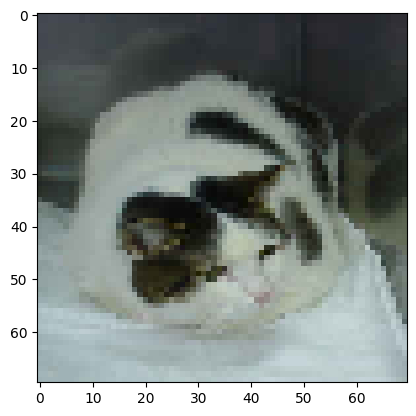

In [23]:
img = keras.utils.load_img("PetImages/Cat/2205.jpg", target_size=image_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = keras.activations.sigmoid(predictions[0][0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

# 3. Рекурентні нейронні мережі

In [1]:
import pandas as pd
import re
import string
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import math
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

2024-01-19 17:39:55.551307: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 17:39:55.880277: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 17:39:55.880529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 17:39:55.923936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 17:39:56.007084: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 17:39:56.008426: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')
df.info()
print('\n\nShape:', df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


Shape: (5171, 4)


In [3]:
df.drop(['Unnamed: 0', 'label'], axis = 1, inplace = True)
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.drop_duplicates(inplace = True)
df.shape

(4993, 2)

In [5]:
stop_words = stopwords.words("english")
stop_words.extend(['subject', 'cc', 'ect', 'hou', 'enron'])

def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = re.sub('nbsp', ' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [6]:
DF = df
DF['text'] = DF['text'].apply(clean_text)
max_size = DF['text'].apply(len).max()
DF.head()

,text,label_num
0,methanol meter follow note gave monday prelimi...,0
1,hpl nom january see attached file hplnol xls h...,0
2,neon retreat ho ho ho around wonderful time ye...,0
3,photoshop windows office cheap main trending a...,1
4,indian springs deal book teco pvr revenue unde...,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(DF['text'], DF['label_num'], test_size = 0.20, random_state = 0)

In [8]:
#токенізуємо текст та перетворимо текстові дані у послідовності цілих чисел  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts = X_train)
dict_size = len(tokenizer.word_index) + 1

x_train = tokenizer.texts_to_sequences(X_train)
x_train_padded = pad_sequences(x_train, maxlen=max_size)

x_test = tokenizer.texts_to_sequences(X_test)
x_test_padded = pad_sequences(x_test, maxlen=max_size)

print(x_test_padded)

[[    0     0     0 ...     7     3    87]
 [    0     0     0 ...     1  1647   231]
 [    0     0     0 ...    68    33    46]
 ...
 [    0     0     0 ...   944 18395  5745]
 [    0     0     0 ...   319     1  1908]
 [    0     0     0 ...   338    10   136]]


In [9]:
#створимо модель та задамо її параметри
model =  keras.Sequential([layers.Embedding(input_dim = dict_size, input_length = max_size, output_dim = 32),
                          layers.LSTM(units = 64, return_sequences = True),
                          layers.Dropout(0.2),
                          layers.LSTM(units = 64),
                          layers.Dropout(0.3),
                          layers.Dense(units = 3, activation = "softmax")])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21435, 32)         1248192   
                                                                 
 lstm (LSTM)                 (None, 21435, 64)         24832     
                                                                 
 dropout (Dropout)           (None, 21435, 64)         0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 1306243 (4.98 MB)
Trainable params: 130624

In [14]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [10]:
model.compile(
    optimizer = 'sgd',
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(x_train_padded, y_train, batch_size = 64, epochs = 5, validation_split = 0.1)

Epoch 1/5
 2/57 [>.............................] - ETA: 3:25:06 - loss: 1.0955 - accuracy: 0.5156

: 

In [ ]:
score = model.evaluate(x_test_padded, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])